# Support Vector Regression
- #### Vector
quantity that has both magnitude and direction
- #### Why called Support Vector Regression?
SVR model supports in creating of vectors towards points
- #### Important Terms
 - Insensitive Tube (boundary on data and error within this boundry is neglectable)
 - SVR is used for both linear and non linear dataset by using linear kernel
 and non linear kernel respectively
 - Kernel (function used to map a lower dimensional data into a high dimensional data)
 - inverse_transform() is used to convert back sclaed values to original values




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

## Loading Dataset

In [3]:
dataset = pd.read_csv("../../../Datasets/position_salaries.csv", sep=",")
dataset.columns = ['position', 'level', 'salary']
dataset.head()

,position,level,salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
samples_count, features_count = dataset.shape
samples_count, features_count

(10, 3)

## Separating target column from dataset

In [9]:
target = dataset.iloc[:, -1].values
dataset = dataset.iloc[:, 1:-1].values

## Feature Scaling

In [11]:
sc_dataset = StandardScaler()
sc_target = StandardScaler()
dataset = sc_dataset.fit_transform(dataset)
target = target.reshape(len(target), 1)
target = sc_target.fit_transform(target)

In [12]:
dataset

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [13]:
target

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

## Support Vector Regression

In [15]:
regressor = SVR(kernel='rbf')
regressor.fit(dataset, target)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Predicting the dataset


In [26]:
predictions = regressor.predict(dataset)
predictions = sc_target.inverse_transform(predictions)
predictions

array([ 73474.15615697,  70786.94584626,  88213.00902103, 108254.98574956,
       122574.52250599, 145503.10688572, 209410.23132923, 330606.89204569,
       471671.95587315, 557821.75899897])

## Prediction by using input data from user

In [21]:
level = input('Enter level (1-10)::')

Enter level (1-10)::4


In [24]:
user_sample = [[float(level)]]
user_sample_encoded = sc_dataset.fit_transform(user_sample)
predicted_salary = sc_target.inverse_transform(regressor.predict(user_sample_encoded))[0]
rounded_salary = round(predicted_salary, 2)
print('salary::', rounded_salary)

salary:: 131106.77


# Visualizing Prediction Results

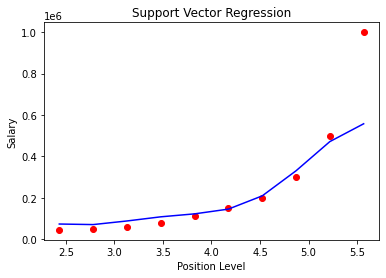

In [28]:
plt.scatter(sc_dataset.inverse_transform(dataset), sc_target.inverse_transform(target), color='red')
plt.plot(sc_dataset.inverse_transform(dataset), predictions, color='blue')
plt.title('Support Vector Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()